In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/raw/teleCust1000t.csv')

In [3]:
# Mostrar las primeras filas del dataset para ver un resumen general
print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [4]:
# Descripción estadística del dataset
print(df.describe())


          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.0000

In [5]:
# Información general del dataset (tipos de datos y valores nulos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None


In [6]:
# Conversión de la columna 'retire' de float a integer
df['retire'] = df['retire'].astype(int)

# Verificar la conversión
print(df.dtypes['retire'])

int32


In [7]:
# Comprobar valores nulos en cada columna
print(df.isnull().sum())

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


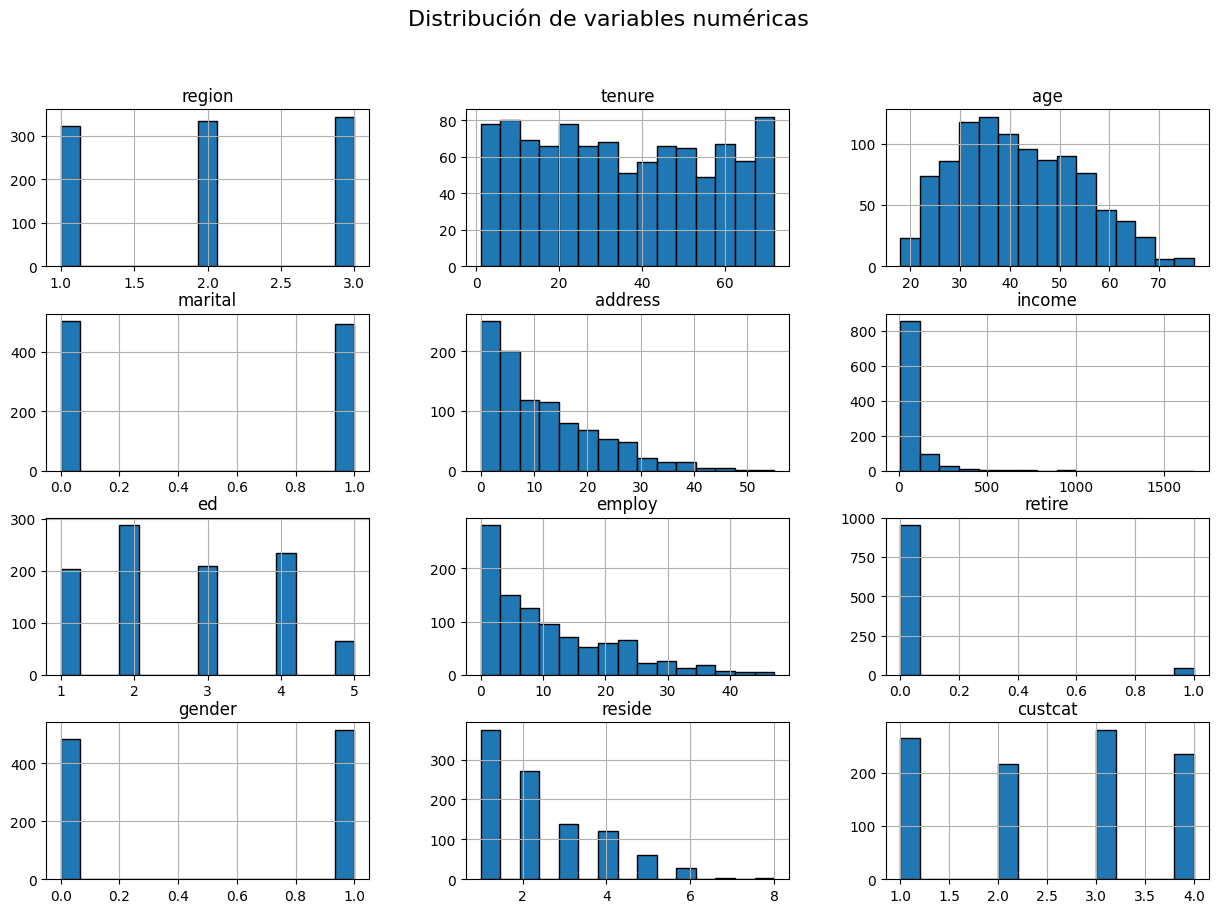

In [8]:
# Visualización de la distribución de las características numéricas
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.show()

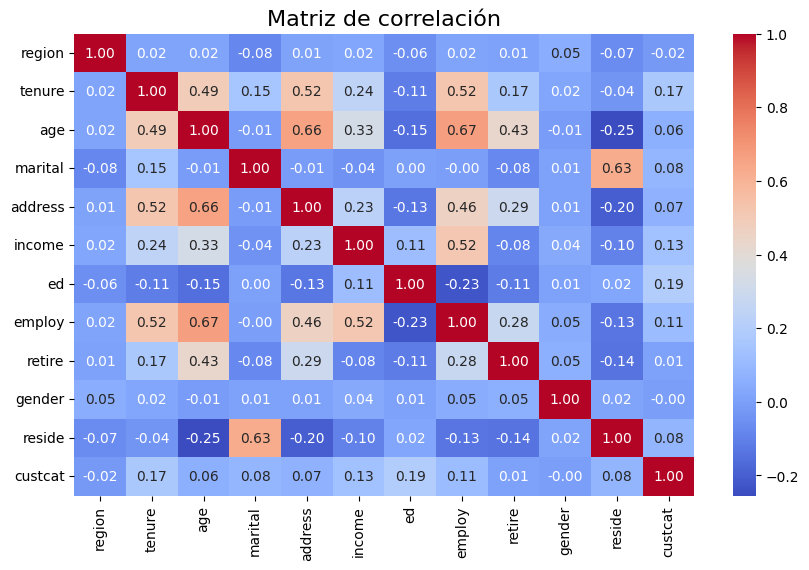

In [9]:
# Visualización de la correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación', fontsize=16)
plt.show()

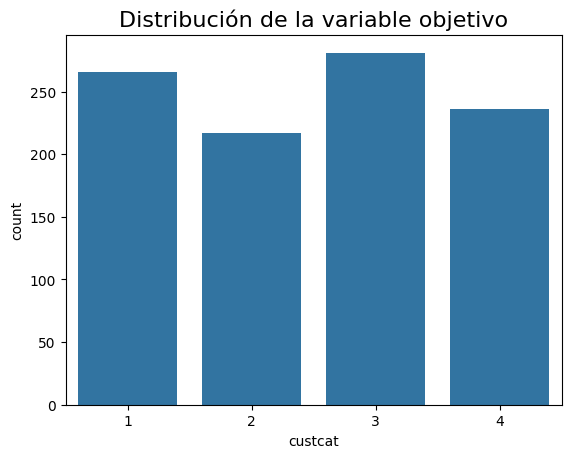

In [10]:
# Visualización de la distribución de la variable target (ejemplo: 'group' o cualquier otra columna relevante)
sns.countplot(data=df, x='custcat')
plt.title('Distribución de la variable objetivo', fontsize=16)
plt.show()


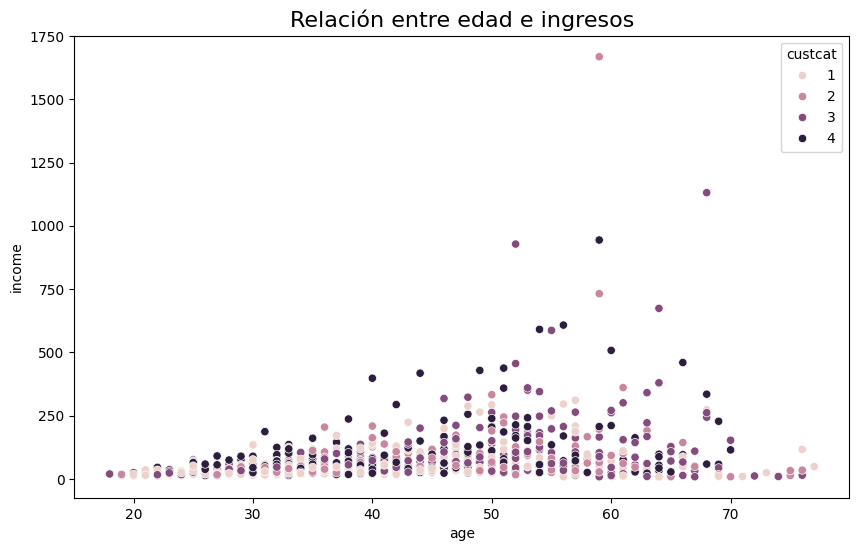

In [11]:
# Gráfico de dispersión para dos variables numéricas y la variable objetivo 'custcat'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='income', hue='custcat')
plt.title('Relación entre edad e ingresos', fontsize=16)
plt.show()

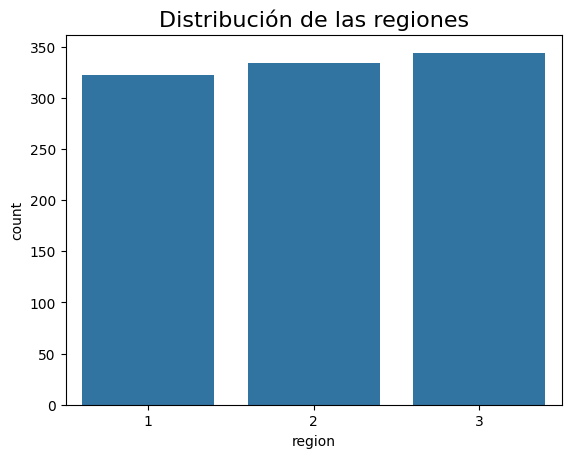

In [12]:
# Gráfico de barras para ver la distribución de una variable categórica (ejemplo: región)
sns.countplot(data=df, x='region')
plt.title('Distribución de las regiones', fontsize=16)
plt.show()

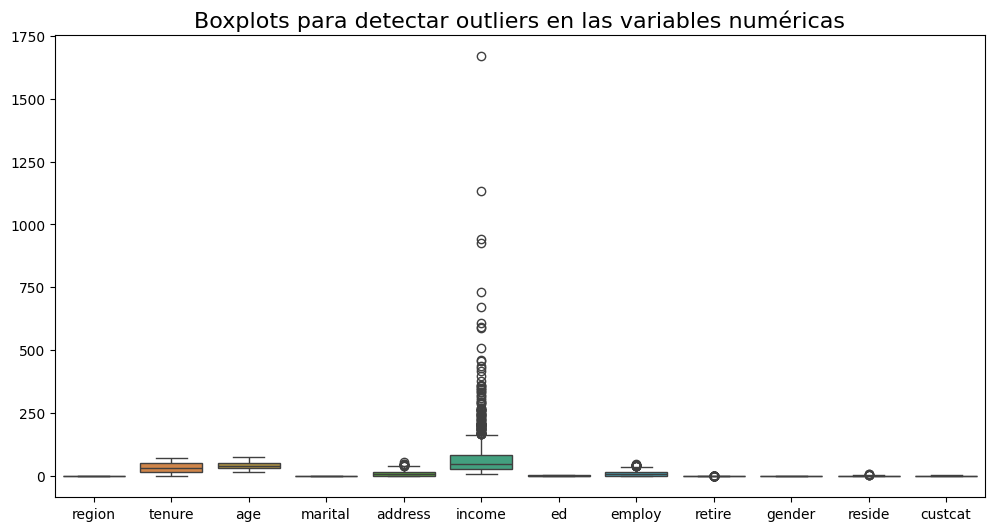

In [13]:
# Boxplots para detectar outliers en las variables numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplots para detectar outliers en las variables numéricas', fontsize=16)
plt.show()

## Agrupar las variables continuas en bins del mismo tamaño

In [14]:
# Lista de columnas a discretizar con su respectivo número de bins
columns_bins = {
    'tenure': 4,
    'age': 4,
    'address': 4,
    'income': 4,
    'employ': 4,
    'reside': 3
}

# Aplicar pd.qcut() a cada columna con su número de bins
for col, bins in columns_bins.items():
    # Agregamos el argumento 'duplicates="drop"' para manejar columnas con bordes duplicados
    df[col + '_bins'] = pd.qcut(df[col], q=bins, labels=False, duplicates='drop')

# Ver el resultado
print(df)

     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5       0   
1         3      11   33        1        7   136.0   5       5       0   
2         3      68   52        1       24   116.0   1      29       0   
3         2      33   33        0       12    33.0   2       0       0   
4         2      23   30        1        9    30.0   1       2       0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0       0   
996       1       7   34        0        2    22.0   5       5       0   
997       3      67   59        0       40   944.0   5      33       0   
998       3      70   49        0       18    87.0   2      22       0   
999       3      50   36        1        7    39.0   3       3       0   

     gender  reside  custcat  tenure_bins  age_bins  address_bins  \
0         0       2        1            0 

In [15]:
# Lista de columnas originales que deseas eliminar
columns_to_drop = ['tenure', 'age', 'address', 'income', 'employ', 'reside']

# Eliminar las columnas originales
df_binned = df.drop(columns=columns_to_drop)

# Ver el DataFrame nuevo sin las columnas originales
print(df_binned)


     region  marital  ed  retire  gender  custcat  tenure_bins  age_bins  \
0         2        1   4       0       0        1            0         2   
1         3        1   5       0       0        4            0         1   
2         3        1   1       0       1        3            3         3   
3         2        0   2       0       1        1            1         1   
4         2        1   1       0       0        3            1         0   
..      ...      ...  ..     ...     ...      ...          ...       ...   
995       3        0   3       0       1        1            0         1   
996       1        0   5       0       1        1            0         1   
997       3        0   5       0       1        4            3         3   
998       3        0   2       0       1        3            3         2   
999       3        1   3       0       1        2            2         1   

     address_bins  income_bins  employ_bins  reside_bins  
0               1           

## Aplicar One Hot Encoding a las variables categóricas no ordinales

In [16]:
# Definir las columnas categóricas que necesitan One-Hot Encoding
categorical_cols = ['gender', 'marital', 'region', 'retire']

# Aplicar One-Hot Encoding solo a esas columnas
df_encoded = pd.get_dummies(df_binned, columns=categorical_cols, drop_first=True)

# Ver el DataFrame transformado
print(df_encoded.head())


   ed  custcat  tenure_bins  age_bins  address_bins  income_bins  employ_bins  \
0   4        1            0         2             1            2            1   
1   5        4            0         1             1            3            1   
2   1        3            3         3             3            3            3   
3   2        1            1         1             2            1            0   
4   1        3            1         0             1            1            0   

   reside_bins  gender_1  marital_1  region_2  region_3  retire_1  
0            0     False       True      True     False     False  
1            1     False       True     False      True     False  
2            0      True       True     False      True     False  
3            0      True      False      True     False     False  
4            1     False       True      True     False     False  


### entrenar el modelo con regresión logística

### definir correctamente las variables para el entrenamiento

In [17]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop('custcat', axis=1)  # Variables predictoras: todas menos 'custcat'
y = df_encoded['custcat']  # Variable objetivo: 'custcat'

# Dividir los datos en entrenamiento (70%) y prueba (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### entrenar el modelo y obtener métricas

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar un modelo de regresión logística multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión (opcional para ver los verdaderos positivos, falsos negativos, etc.)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.37666666666666665
Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.37      0.39        83
           2       0.31      0.23      0.27        65
           3       0.43      0.49      0.46        83
           4       0.33      0.38      0.35        69

    accuracy                           0.38       300
   macro avg       0.37      0.37      0.37       300
weighted avg       0.37      0.38      0.37       300

Confusion Matrix:
 [[31  7 25 20]
 [13 15 20 17]
 [19  8 41 15]
 [15 18 10 26]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### evaluar el overfitting

In [19]:
# Evaluar en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
print("Accuracy en Entrenamiento:", accuracy_score(y_train, y_train_pred))

# Evaluar en el conjunto de prueba (ya hecho anteriormente)
print("Accuracy en Prueba:", accuracy_score(y_test, y_pred))

# Si hay una gran diferencia entre accuracy en entrenamiento y prueba, puede indicar overfitting.


Accuracy en Entrenamiento: 0.45
Accuracy en Prueba: 0.37666666666666665
